### Task: Table Booking and Online Delivery
Determine the percentage of restaurants that offer table booking and online delivery.
Compare the average ratings of restaurant swith table booking and those without.
Analyze the availability of online delive ryamong restaurants with different price ranges.

### Importing Libraries

In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [5]:
# Importing the required dataset
df = pd.read_csv('Dataset .csv')

In [6]:
# getting first five rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


##### **Checking Number of Rows and Columns**

In [8]:
# Get number of rows and columns
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 9551
Number of columns: 21


##### **Check for Missing Values in Each Column and Handle Them Accordingly**

In [10]:
# Check for missing values in each column

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [11]:
# For categorical columns, you can either fill missing values with the mode (most frequent value) or drop them

df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [12]:
# Verify missing values after handling them

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


##### **Perform Data Type Conversion if Necessary**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Note - There is no need type Conversion.

#### **Percentage of Restaurants Offering Table Booking and Online Delivery**

##### **a. Percentage of Restaurants Offering Table Booking**

In [18]:
# Count the number of restaurants offering table booking
table_booking_counts = df['Has Table booking'].value_counts()

In [19]:
# Calculate percentages
table_booking_percentage = (table_booking_counts / len(df)) * 100
print("Percentage of Restaurants Offering Table Booking:\n", table_booking_percentage)

Percentage of Restaurants Offering Table Booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: count, dtype: float64


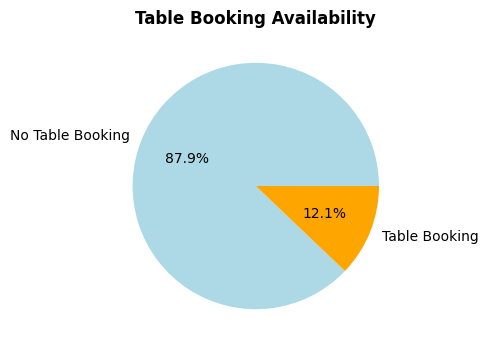

In [62]:
# Visualize the percentages
plt.figure(figsize=(4, 4))
table_booking_counts.plot.pie(autopct="%.1f%%", labels=["No Table Booking", "Table Booking"], colors=["lightblue", "orange"])
plt.title("Table Booking Availability", fontsize=12, weight='bold')
plt.ylabel("")  # Remove y-axis label
plt.show()

**Note -** From above graph we can see that, The Percentage of **No table booking** is more than the percentage of table booking customers.

##### **b. Percentage of Restaurants Offering Online Delivery**

In [22]:
# Count the number of restaurants offering online delivery
online_delivery_counts = df['Has Online delivery'].value_counts()

In [23]:
# Calculate percentages
online_delivery_percentage = (online_delivery_counts / len(df)) * 100
print("Percentage of Restaurants Offering Online Delivery:\n", online_delivery_percentage)

Percentage of Restaurants Offering Online Delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


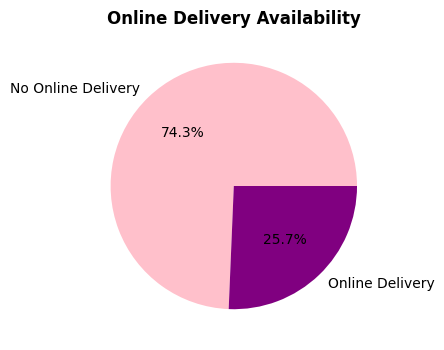

In [67]:
# Visualize the percentages
plt.figure(figsize=(4,4))
online_delivery_counts.plot.pie(autopct="%.1f%%", labels=["No Online Delivery", "Online Delivery"], colors=["pink", "purple"])
plt.title("Online Delivery Availability", fontsize=12, weight='bold')
plt.ylabel("")  # Remove y-axis label
plt.show()

**Note -** From above graph we can see that, The percentage of **Offline Delivery** is more than the percentage of Online Delivery.

#### **Compare Average Ratings of Restaurants With and Without Table Booking**

In [26]:
# Group by 'Has Table booking' and calculate average ratings
avg_ratings_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("Average Ratings (With and Without Table Booking):\n", avg_ratings_table_booking)

Average Ratings (With and Without Table Booking):
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


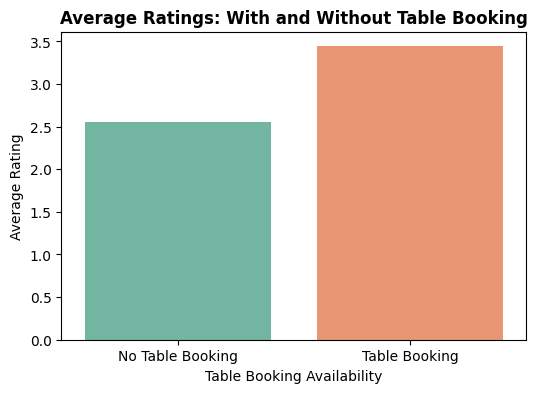

In [93]:
# Visualize the comparison
plt.figure(figsize=(6,4))
sns.barplot(x=['No Table Booking', 'Table Booking'], y=avg_ratings_table_booking.values, palette="Set2")
plt.title("Average Ratings: With and Without Table Booking", fontsize=12, weight='bold')
plt.ylabel("Average Rating")
plt.xlabel("Table Booking Availability")
plt.show()

**Note -** From above graph we can see that, The number of **table booked** customers is more than the number of No table booked customers.

#### **Analyze Online Delivery Availability Across Different Price Ranges**

In [29]:
# Group by 'Price range' and 'Has Online delivery', and count occurrences
online_delivery_price_range = df.groupby(['Price range', 'Has Online delivery']).size().unstack()

In [30]:
# Normalize to calculate percentages for each price range
online_delivery_percentage_price_range = online_delivery_price_range.div(online_delivery_price_range.sum(axis=1), axis=0) * 100
print("Online Delivery Availability Across Price Ranges (Percentage):\n", online_delivery_percentage_price_range)

Online Delivery Availability Across Price Ranges (Percentage):
 Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


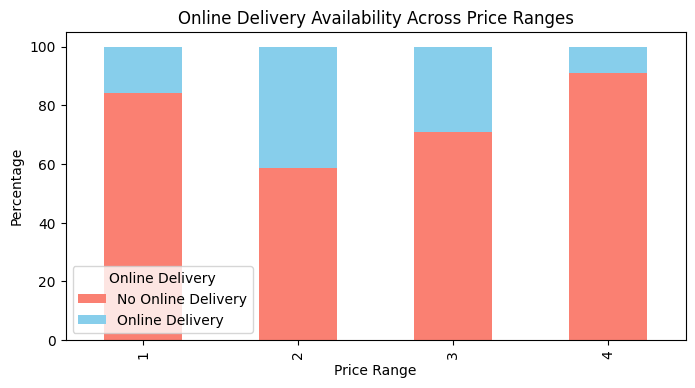

In [31]:
# Visualize the availability of online delivery across price ranges
online_delivery_percentage_price_range.plot(kind='bar', stacked=True, figsize=(8,4), color=["salmon", "skyblue"])
plt.title("Online Delivery Availability Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Percentage")
plt.legend(["No Online Delivery", "Online Delivery"], title="Online Delivery")
plt.show()

**Note -** From above graph we can see that, In all price ranges **Offline delivery** is more than the Online Delivery.